In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_excel("drive/MyDrive/Colab Notebooks/data.xlsx")

df = df[["ХСН", "САД", "КСР", "QRS", "HCT", "PLT", "СКФ"]]
# Delete the lines without date
df = df.dropna()

result = df.columns[0]
params = df.columns[1:]

df.head()

,ХСН,САД,КСР,QRS,HCT,PLT,СКФ
0,0,170.0,32,78,29.6,263.0,40.0
1,0,100.0,36,91,38.5,223.0,69.3
2,0,170.0,22,85,35.4,189.0,80.0
3,0,170.0,26,92,37.6,226.0,70.4
4,0,130.0,26,98,42.0,208.0,94.0


In [17]:
knn_model = KNeighborsClassifier(n_neighbors=4)
X = df[['САД', 'КСР']]
y = df['ХСН']
X_knn = knn_model.fit(X, y)

predictions = X_knn.predict(X) #Определим метки классов для тестовых данных
accuracy_score(y, predictions) #Оценим точность определения меток

0.978494623655914

In [15]:
confusion_matrix(y, predictions)

array([[ 44,   4],
       [  2, 229]])

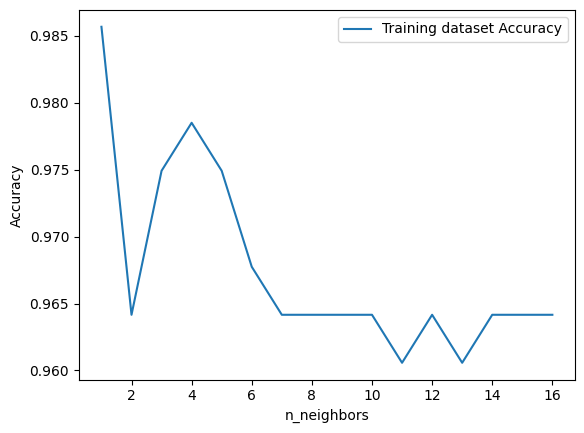

In [16]:
neighbors = np.arange(1, 17)
train_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X, y)

# Generate plot
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-21-c23365c8c336>:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X['САД'], y=X['КСР'], hue=df['ХСН'], palette=cmap_bold, alpha=1.0, edgecolor="black")


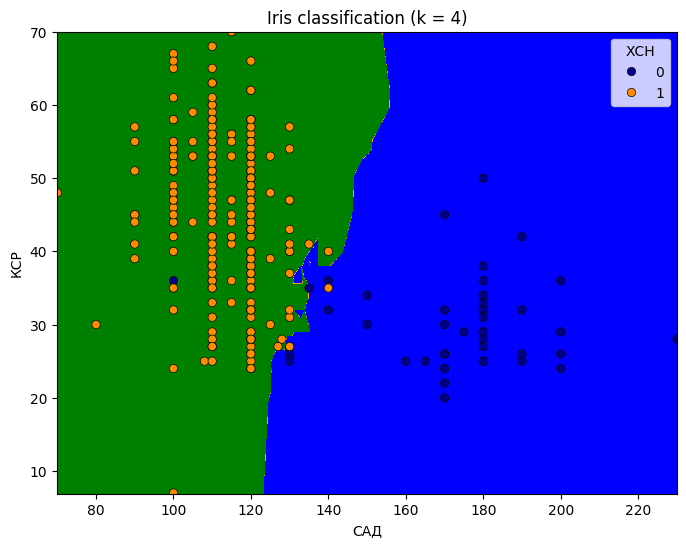

In [21]:
n_neighbors = 4

h = .1  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['blue', 'orange', 'green'])
cmap_bold = ['darkblue', 'darkorange', 'darkgreen']

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['САД'].min() - 0.1, X['САД'].max() + 0.1
y_min, y_max = X['КСР'].min() - 0.1, X['КСР'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X['САД'], y=X['КСР'], hue=df['ХСН'], palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris classification (k = %i)" % (n_neighbors))
plt.xlabel('САД')
plt.ylabel('КСР')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-22-ec0be86e8961>:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X['САД'], y=X['КСР'], hue=df['ХСН'], palette=cmap_bold, alpha=1.0, edgecolor="black")


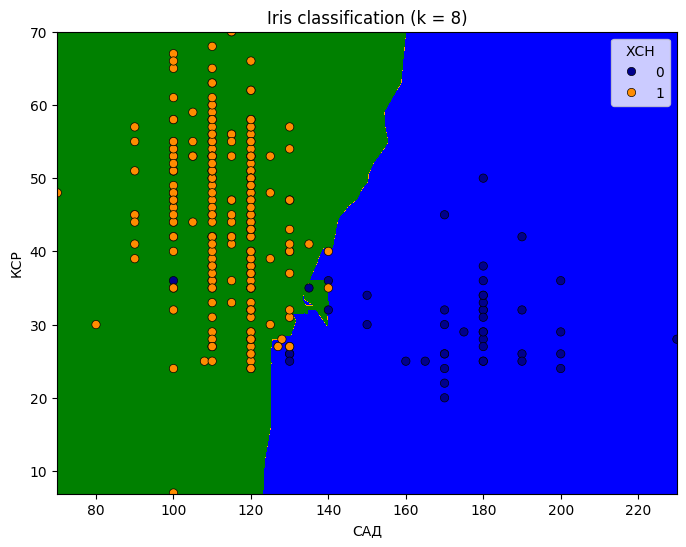

In [22]:
n_neighbors = 8

h = .1 # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['blue', 'orange', 'green'])
cmap_bold = ['darkblue', 'darkorange', 'darkgreen']

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['САД'].min() - 0.1, X['САД'].max() + 0.1
y_min, y_max = X['КСР'].min() - 0.1, X['КСР'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X['САД'], y=X['КСР'], hue=df['ХСН'], palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris classification (k = %i)" % (n_neighbors))
plt.xlabel('САД')
plt.ylabel('КСР')

plt.show()